In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
df= pd.read_csv('movies.dat', sep='::', encoding='ISO-8859-1')
df

/var/folders/b5/qd0s7b0d7cg48d0n9kg8c6lr0000gn/T/ipykernel_35963/2545405554.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df= pd.read_csv('movies.dat', sep='::', encoding='ISO-8859-1')


FileNotFoundError: [Errno 2] No such file or directory: 'movies.dat'

In [633]:
df.columns # veo los nombres de las columnas y evidentemente, es lo que parece. 

Index(['1', 'Toy Story (1995)', 'Animation|Children's|Comedy'], dtype='object')

- Veo que la gráfica está desplazada, usa la primera fila como nombres de columna. 

Entonces, o la importamos diciendo que no hay encabezado a fin de dejar el espacio para posterior nombramiento de columnas,


In [634]:
df = pd.read_csv('movies.dat', sep='::', encoding='ISO-8859-1', header=None)  
df

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


o bien añado los nombres de las columnas al importar (Opción que parece más fácil).

In [635]:
df= pd.read_csv('movies.dat', sep='::', encoding='ISO-8859-1',names= ['id','movieN+Y', 'Genre'])
df

,id,movieN+Y,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [636]:
df.columns

Index(['id', 'movieN+Y', 'Genre'], dtype='object')

Pero claro, hasta que no ves el DF no sabes con lo que te vas a encontrar. 

- El segundo tema es el índice, que no coincide con el importado. Puesto que no coincide con el número de filas.

Lo que me hace pensar, que no es una buena idea renombrarlo con (df.reset_index(drop=True) porque me da miedo que este número sea el 'ID'de la película y esté vinculado con otras tablas.

- Ahora quiero dividir la columna de movieN+Date por dos columnas: Movie (string) y date/año (int) a fin de poder clasificar por años si interesa. Y saber cuantos años hay catalogados.

In [637]:
df1=df.copy()
df1

,id,movieN+Y,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [638]:
# explicación: r'\(\d{4}\)': Esta es una expresión regular que busca una secuencia de cuatro dígitos encerrada en paréntesis. Explicado más detalladamente:
#\(: Esto busca un paréntesis de apertura. Dado que los paréntesis son caracteres especiales en expresiones regulares, se deben escapar con \ para que se interpreten literalmente.
#\d{4}: Esto busca exactamente cuatro dígitos consecutivos (que representan el año).
#\): Esto busca un paréntesis de cierre.
#'': Esto es la cadena de reemplazo y está vacía, lo que significa que cualquier coincidencia con el patrón será reemplazada por una cadena vacía, lo que efectivamente elimina los años y los paréntesis.
#regex=True: Indica que estás utilizando una expresión regular en el patrón de búsqueda

- Nombro dos columnas nuevas: A la primera, le extraemos el año, que equivale a 4 dígitos entre paréntesis. A la segunda, le digo de vaciar el espacio '' que ocupaba año.
- Luego elimino la antigua columna.


In [639]:
df1['año'] = df['movieN+Y'].str.extract(r'(\d{4})')
df1['peli'] = df['movieN+Y'].str.replace(r'\(\d{4}\)', '', regex=True)

df1.drop('movieN+Y', axis=1, inplace=True)
df1 # dataframe con año separado y eliminado de movie.

,id,Genre,año,peli
0,1,Animation|Children's|Comedy,1995,Toy Story
1,2,Adventure|Children's|Fantasy,1995,Jumanji
2,3,Comedy|Romance,1995,Grumpier Old Men
3,4,Comedy|Drama,1995,Waiting to Exhale
4,5,Comedy,1995,Father of the Bride Part II
...,...,...,...,...
3878,3948,Comedy,2000,Meet the Parents
3879,3949,Drama,2000,Requiem for a Dream
3880,3950,Drama,2000,Tigerland
3881,3951,Drama,2000,Two Family House


- Ahora voy a dividir la columna de Genre.
El ejercicio decía que era importante quedarse con un solo género por cada película, pero al no ser del sector, y por miedo a no quedarme con la más importante, he decidido crear una columna subgénero para guardar las restantes.

In [640]:
df2= df1.copy()
df2[['genero', 'subgenero']] = df['Genre'].str.split(r'\|', n=1, expand=True)
#dividir la columna 'genre' en dos partes utilizando la expresión regular r'\|', que coincide con el carácter '|'. El argumento n=1 garantiza que solo se realice una división en el primer '|', creando así dos columnas: 'subgenre' y 'genre'.
df2.drop('Genre', axis=1, inplace=True)
df2

,id,año,peli,genero,subgenero
0,1,1995,Toy Story,Animation,Children's|Comedy
1,2,1995,Jumanji,Adventure,Children's|Fantasy
2,3,1995,Grumpier Old Men,Comedy,Romance
3,4,1995,Waiting to Exhale,Comedy,Drama
4,5,1995,Father of the Bride Part II,Comedy,None
...,...,...,...,...,...
3878,3948,2000,Meet the Parents,Comedy,None
3879,3949,2000,Requiem for a Dream,Drama,None
3880,3950,2000,Tigerland,Drama,None
3881,3951,2000,Two Family House,Drama,None


In [641]:
df2['genero'].count()

3883

In [642]:
df2['subgenero'].count() # tendré que ver qué pongo en las celdas vacías restantes.

1858

Vemos que en el caso de género, todas las películas tienen un primer género asignado, cosa que no pasa en subgénero.
Así que voy a pensar una palabra para las casillas vacías. De todas formas quiero ver si hay más NaN que los mencionados.

- Ahora quiero convertir los datos de objeto a : integro en el caso de fecha, y categoría en el caso de género.

In [643]:
df2['año'] = df2['año'].astype('int')
df2['genero']= df2['genero'].astype('category')

In [644]:
df2.info() # ver qué datos convertir: año a date, género a categoría y el resto los puedo dejar a objetos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         3883 non-null   int64   
 1   año        3883 non-null   int64   
 2   peli       3883 non-null   object  
 3   genero     3883 non-null   category
 4   subgenero  1858 non-null   object  
dtypes: category(1), int64(2), object(2)
memory usage: 125.9+ KB


In [645]:
df2['subgenero'].fillna("no existen subcategorías", inplace=True)

In [646]:
df2.isnull().value_counts()

id     año    peli   genero  subgenero
False  False  False  False   False        3883
dtype: int64

In [647]:
df2

,id,año,peli,genero,subgenero
0,1,1995,Toy Story,Animation,Children's|Comedy
1,2,1995,Jumanji,Adventure,Children's|Fantasy
2,3,1995,Grumpier Old Men,Comedy,Romance
3,4,1995,Waiting to Exhale,Comedy,Drama
4,5,1995,Father of the Bride Part II,Comedy,no existen subcategorías
...,...,...,...,...,...
3878,3948,2000,Meet the Parents,Comedy,no existen subcategorías
3879,3949,2000,Requiem for a Dream,Drama,no existen subcategorías
3880,3950,2000,Tigerland,Drama,no existen subcategorías
3881,3951,2000,Two Family House,Drama,no existen subcategorías


Ara he observat que l'exercici demana que el DF final , només pot contenir 3 variables:  nom de la pel·lícula, any i genere. Amb un sol gènere per a cada pel·lícula.
- Així que faré el DF definitiu i eliminaré l'ID antic i la casella de subtrama.

In [648]:
DF_DEF = pd.DataFrame(columns=['año', 'peli', 'genero'])  # creo DataFrame vacío con las columnas que deseo.
DF_DEF[['año', 'peli', 'genero']] = df2[['año', 'peli', 'genero']].copy()  # Copio las columnas correspondientes
DF_DEF.sort_values(by='año',inplace=True)
# podría haber hecho como siempre, copia y elimino las que me sobran.
DF_DEF

,año,peli,genero
1398,1600,Murder at 1600,Mystery
2622,1900,"Legend of 1900, The (Leggenda del pianista sull'oceano)",Drama
3063,1919,Daddy Long Legs,Comedy
2752,1919,Male and Female,Adventure
2754,1919,"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See)",Action
...,...,...,...
912,2001,2001: A Space Odyssey,Drama
2242,2010,2010,Mystery
665,3000,Mystery Science Theater 3000: The Movie,Comedy
3775,8230,And God Created Woman (Et Dieu&#8230;Créa la Femme),Drama


- Me dispongo a ver el rango de años de la base de datos, para deducir errores y evitar encontrarmelos posteriormente en las gráficas.

In [649]:
DF_DEF['año'].unique()

array([1600, 1900, 1919, 1920, 1921, 1922, 1923, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2010, 3000, 8230, 9000])

- Observo valores disparados, voy a ver en qué cantidad los tenemos y como corregirlos.

In [650]:
DF_1600 = (DF_DEF['año']==1600).value_counts()
DF_1600

False    3882
True        1
Name: año, dtype: int64

In [651]:
DF_3000 = (DF_DEF['año'] >=3000).value_counts()
DF_3000

False    3880
True        3
Name: año, dtype: int64

- Observo que son errores tipográficos, puesto que hay uno de cada y no podemos tener películas del año 1600 ni de años futuros. 

In [652]:
fila_con_1600 = DF_DEF[DF_DEF['año'] == 1600]
fila_con_1600

,año,peli,genero
1398,1600,Murder at 1600,Mystery


In [653]:
pd.set_option('display.max_colwidth', None) # Configura la opción para mostrar la columna completa
fila_mas_2010 = DF_DEF[DF_DEF['año'] > 2010]
fila_mas_2010

,año,peli,genero
665,3000,Mystery Science Theater 3000: The Movie,Comedy
3775,8230,And God Created Woman (Et Dieu&#8230;Créa la Femme),Drama
2239,9000,Detroit 9000,Action


- Me doy cuenta que en todos los años erróneos, está la cifra en parte del título de la peli.

Me dispongo a sustituir los años de las 4 filas por un texto que ponga 'sin año' 

In [654]:
DF_DEF.loc[(DF_DEF['año'] < 1900) | (DF_DEF['año'] > 2100), 'año'] = 'sin año'

Compruebo que haya salido bien

In [655]:
filas_seleccionadas = DF_DEF.loc[[1398, 665, 3775, 2239]]
print(filas_seleccionadas)

          año                                                  peli   genero
1398  sin año                                       Murder at 1600   Mystery
665   sin año              Mystery Science Theater 3000: The Movie    Comedy
3775  sin año  And God Created Woman (Et Dieu&#8230;Créa la Femme)     Drama
2239  sin año                                         Detroit 9000    Action


In [656]:
# DF_DEF.loc[1398] si las quiero ver una por una.

- Me dispongo a analizar si son muchos a fin de limpiarlos.

In [657]:
caracteres_especiales = DF_DEF[DF_DEF['peli'].str.contains(r'[^\w\s]', regex=True)]
# busca cualquier carácter que no sea una letra, un dígito o un espacio en blanco.
# Esto incluirá caracteres especiales como signos de puntuación, símbolos, etc.
caracteres_especiales

,año,peli,genero
2622,1900,"Legend of 1900, The (Leggenda del pianista sull'oceano)",Drama
2754,1919,"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See)",Action
3240,1920,"Dog's Life, A",Comedy
3162,1920,"Saphead, The",Comedy
3241,1921,"Kid, The",Action
...,...,...,...
3650,2000,Love's Labour's Lost,Comedy
3882,2000,"Contender, The",Drama
912,2001,2001: A Space Odyssey,Drama
665,sin año,Mystery Science Theater 3000: The Movie,Comedy


Estamos hablando de 1611 filas donde se usan caracteres especiales, con lo cual, se van a quedar así. 
- Me da la sensación que el archivo no está limpio, pero supongo que lo importante es poder sacar estadísticas, y puesto que es la fila que cambia siempre, no vale la pena porque no se va a agrupar.

### EXERCICI 3 .- 

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

- Em plantejo una gràfica per saber % de cada categoria segons any

In [658]:
# creo DF per obtenir el total de valors de genere

genero_conta = DF_DEF['genero'].value_counts()
genero_conta.sort_values(ascending=False)
genero_conta

Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Musical          25
Film-Noir        25
War              12
Fantasy           2
Name: genero, dtype: int64

In [659]:
genero_conta.sort_values()

Fantasy           2
War              12
Film-Noir        25
Musical          25
Western          33
Mystery          36
Sci-Fi           46
Romance          50
Children's       89
Animation        90
Thriller        101
Documentary     123
Crime           131
Adventure       155
Horror          262
Action          503
Comedy         1024
Drama          1176
Name: genero, dtype: int64

Text(0, 0.5, 'Género')

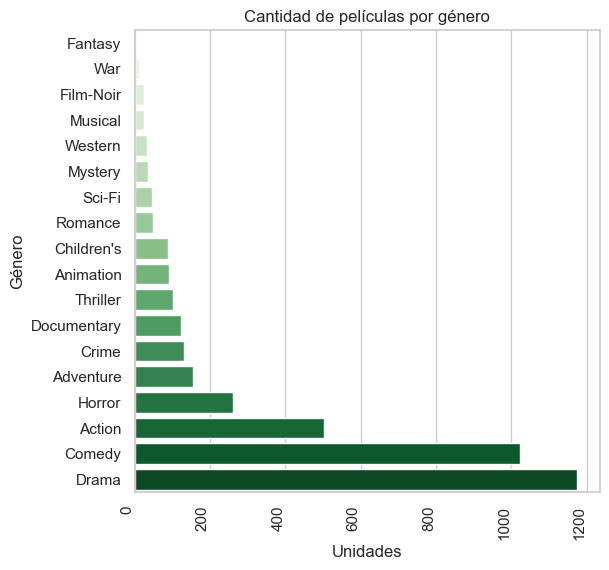

In [661]:
plt.figure(figsize=(6, 6))
sns.barplot(y=genero_conta.index, x=genero_conta.values, palette="Greens",order=genero_conta.sort_values(ascending=True).index)
plt.xticks(rotation=90, ha='right')
plt.title('Cantidad de películas por género')
plt.xlabel('Unidades')
plt.ylabel('Género')

- En esta gráfica aparecen los títulos con más ítems, siendo Drama, comedia las que destacan en cuanto a cantidad de datos.

- También hay muchas películas de acción. Y me sorprende Horror, que siendo un género bastante singular, tiene muchas entradas. Pero tiene lógica, puesto que solo hemos seleccionado la primera clasificación de género. Y cuando un libro es de Horror, supongo que lo pones en la primera categoría.

Me dispongo a hacer una gráfica donde se pueda observar la cantidad de pelis por género y año. 
- Como tengo 4 datos en las casillas (1398, 665, 3775, 2239) de años, con el resultado  "sin año". Las eliminaré temporalmente para poder sacar la gráfica.

Creo copia del DF y creo uno nuevo que no contendrá las 4 filas sin años.

In [662]:
DF_falta4 = DF_DEF.copy()

In [663]:
años_eliminar = [1398, 665, 3775, 2239]

In [664]:
DF_falta4.drop([1398, 665, 3775, 2239], inplace=True)

In [665]:
len(DF_DEF)


3883

In [666]:
len(DF_falta4)

3879

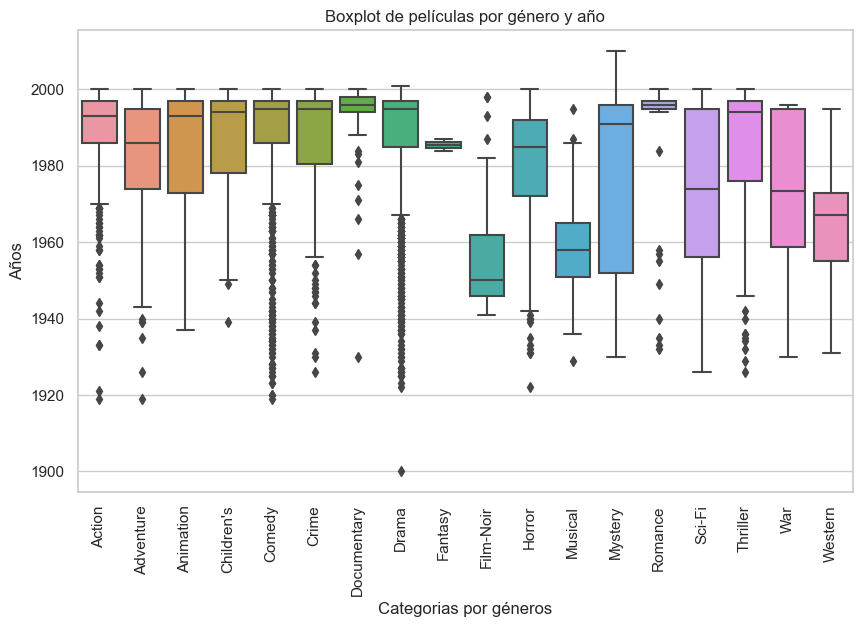

<Figure size 640x480 with 0 Axes>

In [667]:
sns.set(style="whitegrid") # Estil de la gràfica amb fons blanc
plt.figure(figsize=(10, 6)) # mides de la gràfica 
sns.boxplot(x="genero", y="año", data=DF_falta4) # valors. Estil seria amb palette=
plt.title('Boxplot de películas por género y año') # nom de la gràfica
plt.xlabel('Categorias por géneros')
plt.ylabel('Años')
plt.xticks(rotation=90) # roto etiquetes per guanyar espai.

plt.show()
plt.savefig('Boxplot_genere_anys')

- Esta gráfica no me sirve, porque no me muestra la densidad, y aunque las cajas me explican entre qué años encontramos cada género, podría entender por ejemplo, que hay muchos más valores de western o guerra, de los que en verdad hay.

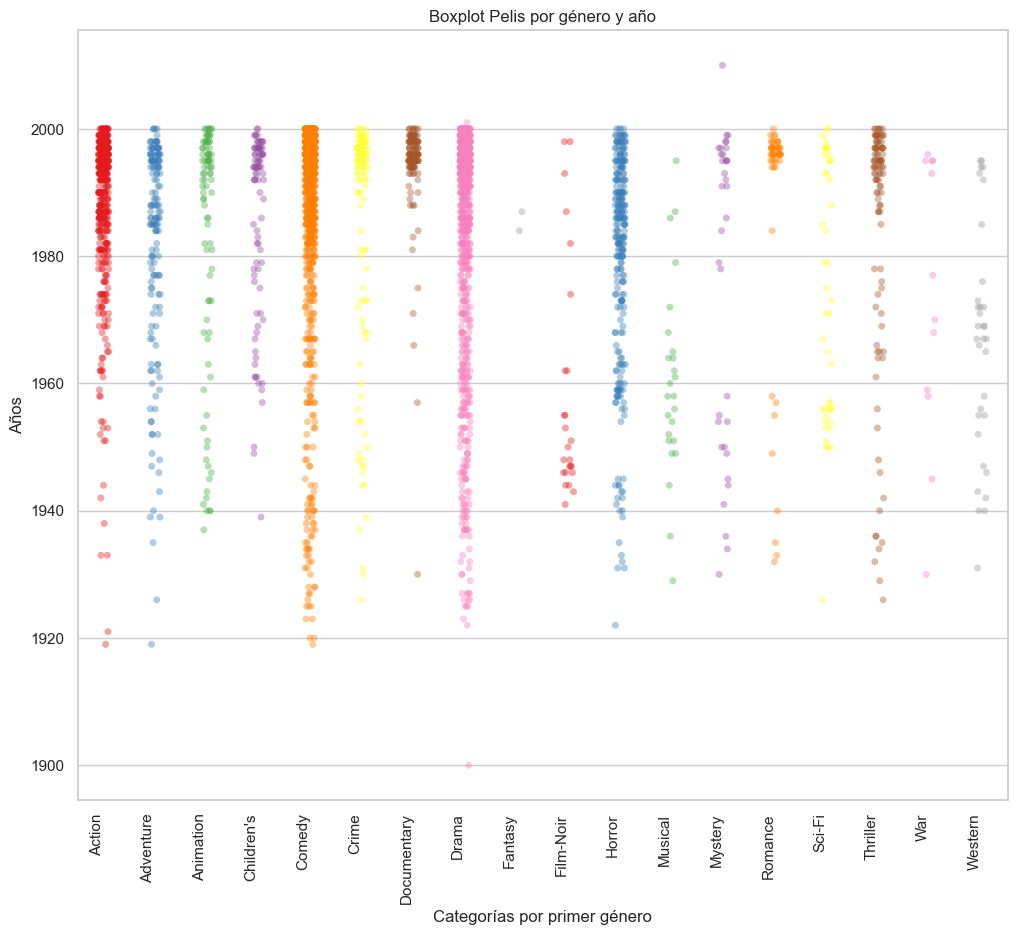

<Figure size 640x480 with 0 Axes>

In [674]:
plt.figure(figsize=(12, 10))
sns.stripplot(x='genero', y='año', data=DF_falta4, jitter=True,palette="Set1", alpha=0.4) # jitter=True agrega un pequeño desplazamiento aleatorio a los puntos de datos en el eje X, evita que los puntos se superpongan directamente en los mismos valores de X.
sns.set(style="whitegrid")
plt.xticks(rotation=90, ha='right')
plt.title('Boxplot Pelis por género y año')
plt.xlabel ('Categorías por primer género') 
plt.ylabel ('Años') 
plt.show()
plt.savefig('Stripplot_genere_anys')

- Observamos una gráfica de distribución con la repartición de los ítems muy exageradamente hacia la parte superior, donde los valores recaen en los años más actuales. A excepción de la novela negra, donde se concentra entre los años 40 y 60.
- Me sorprende la poca cantidad de ítems de Fantasía. Aunque, supongo que como subgénero, habría más. 

In [672]:
subgenero_fantasia = df2['subgenero'].str.contains('Fantasy')
cantidad_fantasia_subgenero = subgenero_fantasia.sum()
print(f"Total de ítems con 'Fantasy' en la columna 'subgenero': {cantidad_fantasia_subgenero}")

Total de ítems con 'Fantasy' en la columna 'subgenero': 66


In [673]:
genero_fantasia = df2['genero'].str.contains('Fantasy')
cantidad_fantasia_genero = genero_fantasia.sum()
print(f"Total de ítems con 'Fantasy' en la columna 'subgenero': {cantidad_fantasia_genero}")

Total de ítems con 'Fantasy' en la columna 'subgenero': 2


Aquí podemos comprobar que en realidad se trata de una desviación, al haber subdividido la casilla género. Básicamente, viendo las primeras filas ante de dividir el género, observamos que los nombres aparecían por orden alfabético, así que como Fantasía empieza por F, ha quedado en muchos casos, en la columna de subgénero y no en la de género.

- Con esto, y si no fuera porque el ejercicio me pide de forma expresa de quedarme con una sola columna, sigo pensando que mi idea de guardar la casilla subgenero era buena.
